In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Acme Insurance Company sells auto insurance directly to consumers via Vertical Search websites. 
#On these websites, consumers who are already shopping for auto insurance enter some information about themselves and 
#then are shown ads from insurance companies. Each ad shown is called an "impression" and each record in this table 
#represents one ad impression.

# These ads are shown based on an online auction where insurance companies bid to have their ad shown, 
# and the ads are shown in order based on the highest bid amount. The insurance companies only pay if 
# their ad is clicked on, but bidding higher will cause the ad to be shown higher in the ranking and is 
# more likely to be clicked on if it is in a higher position.

# Acme currently bids $10 for all customers, but is able to set different bid prices for different types of customers.
# For example, Acme could bid $10 for all customers with 1 vehicle and $12 for all customers with 2 vehicles. 

# Acme would like to come up with a bidding strategy which optimizes the cost per customer acquired while ensuring
# that for every 10,000 ads shown they are expected to acquire at least 400 customers. How should Acme set prices by 
# customers segment?
# The channel manager who buys advertising on this vertical search website would also like to know if in
# the course of your analysis you come across any other interesting findings!


In [4]:
Acme=pd.read_csv("Acme.csv")
Acme.policies_sold[Acme['policies_sold']== " -   "]=0
Acme.policies_sold[Acme['policies_sold']== " 1 "]=1
Acme.marital_status[Acme['marital_status']== "S"]=0
Acme.marital_status[Acme['marital_status']== "M"]=1
Acme.currently_insured[Acme['currently_insured']== "N"]=0
Acme.currently_insured[Acme['currently_insured']== "Y"]=1
Acme['clicked']=0
Acme.clicked[Acme[' clicked_ad ']== " 1 "]=1
Acme=Acme.drop(columns=[' clicked_ad ']);
# Acme['policy_sold']=0
# Acme.policy_sold[Acme['policies_sold']== " 1 "]=1
# Acme=Acme.drop(columns=['policies_sold']);


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site

In [5]:
Acme.head()

,impression_id,cost,currently_insured,number_of_vehicles,number_of_drivers,marital_status,ranked_as,policies_sold,clicked
0,1,10,0,1,1,1,1,1,1
1,2,10,0,2,1,1,4,0,0
2,3,10,0,1,1,0,2,0,0
3,4,10,1,2,1,1,5,0,0
4,5,10,1,2,2,0,4,0,0


In [6]:
len(Acme[Acme.policies_sold==1])
# len(Acme[(Acme.number_of_drivers==1)&(Acme.clicked==1)])
# len(Acme[(Acme.number_of_drivers==1)&(Acme.policies_sold==1)])
Acme.number_of_vehicles.value_counts()

2    6083
1    3917
Name: number_of_vehicles, dtype: int64

In [7]:
Perc_buy_rank=np.zeros([4,5,6])
for j in range(4):
    print(j)
    if j==1 or j==2:
        inc=1
    else:
        inc=0
    for i in range(5):
        a=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==0+inc)])
        b=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==0+inc)&(Acme.clicked==1)])
        c=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==0+inc)&(Acme.policies_sold==1)])
        if b==0 & a==0:
            Perc_buy_rank[j,i,0:3]=[0,0,0]
        else:
            if b==0:
                Perc_buy_rank[j,i,0:3]=[c/a,b/a,0]
            else:
                Perc_buy_rank[j,i,0:3]=[c/a,b/a,c/b]
        a=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==1+inc)])
        b=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==1+inc)&(Acme.clicked==1)])
        c=len(Acme[(Acme.iloc[:,6]==i+1)&(Acme.iloc[:,j+2]==1+inc)&(Acme.policies_sold==1)])
        if b==0 & a==0:
            Perc_buy_rank[j,i,3:6]=[0,0,0]
        else:
            if b==0:
                Perc_buy_rank[j,i,3:6]=[c/a,b/a,0]
            else:
                Perc_buy_rank[j,i,3:6]=[c/a,b/a,c/b]

0
1
2
3


# 

In [8]:
Perc_buy_rank

array([[[0.25495376, 0.50330251, 0.50656168, 0.17866667, 0.53333333,
         0.335     ],
        [0.09589041, 0.19315068, 0.4964539 , 0.04366197, 0.17746479,
         0.24603175],
        [0.05857385, 0.1434635 , 0.40828402, 0.04179567, 0.15944272,
         0.26213592],
        [0.01465201, 0.03571429, 0.41025641, 0.01573034, 0.04569288,
         0.3442623 ],
        [0.01119105, 0.02318145, 0.48275862, 0.0078125 , 0.0171875 ,
         0.45454545]],

       [[0.22968198, 0.51325088, 0.4475043 , 0.        , 0.        ,
         0.        ],
        [0.0749543 , 0.18647166, 0.40196078, 0.05491329, 0.18208092,
         0.3015873 ],
        [0.05253623, 0.14855072, 0.35365854, 0.04758419, 0.15446559,
         0.30805687],
        [0.02044293, 0.04599659, 0.44444444, 0.01358696, 0.03967391,
         0.34246575],
        [0.        , 0.        , 0.        , 0.00948242, 0.02015014,
         0.47058824]],

       [[0.25835866, 0.5106383 , 0.50595238, 0.21793275, 0.5143213 ,
         0.423728

In [75]:
x=np.array([0,1])
lst=np.array(np.meshgrid(x, x, x, x)).reshape(-1,4)

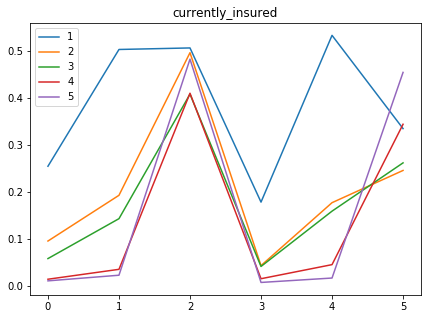

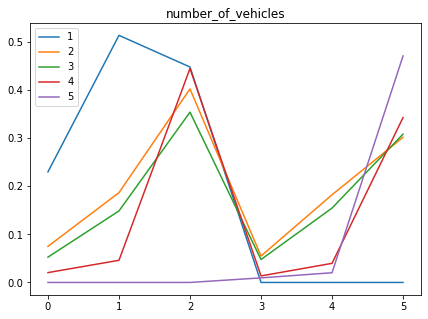

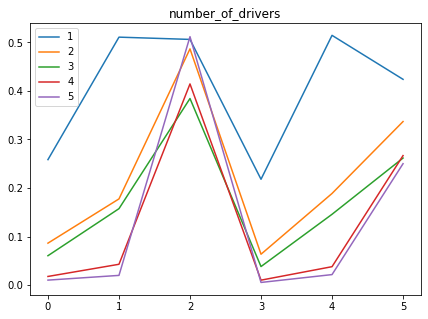

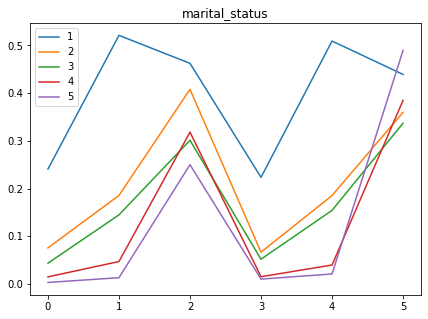

In [76]:
for j in range(4):
    plt.figure(figsize=(7,5))
    for i in range(5):
        num=str(i+1)
        plt.plot(range(6),Perc_buy_rank[j,i,:],
            label = num)
    plt.legend(fontsize=10)
    plt.title(Acme.columns[j+2])
    plt.show()

In [77]:
x=np.array([0,1])
lst=np.array(np.meshgrid(x, x, x, x)).reshape(-1,4)

In [78]:
x=np.array([0,1])
lst=np.array(np.meshgrid(x, x, x, x)).T.reshape(-1,4)
lst[:,1:3]=lst[:,1:3]+1
lst

array([[0, 1, 1, 0],
       [0, 2, 1, 0],
       [1, 1, 1, 0],
       [1, 2, 1, 0],
       [0, 1, 2, 0],
       [0, 2, 2, 0],
       [1, 1, 2, 0],
       [1, 2, 2, 0],
       [0, 1, 1, 1],
       [0, 2, 1, 1],
       [1, 1, 1, 1],
       [1, 2, 1, 1],
       [0, 1, 2, 1],
       [0, 2, 2, 1],
       [1, 1, 2, 1],
       [1, 2, 2, 1]])

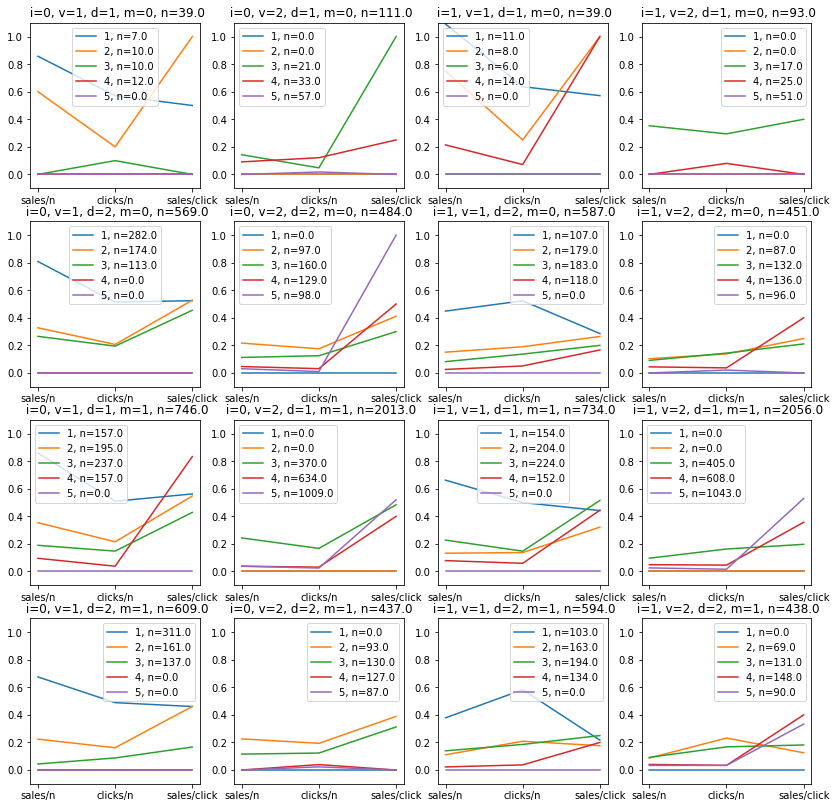

In [79]:
Perc_by_rank=np.zeros([16,5,5])

for j in range(16):
    for i in range(5):
        df=Acme[(Acme.iloc[:,2]==lst[j,0])&(Acme.iloc[:,3]==lst[j,1])&(Acme.iloc[:,4]==lst[j,2])&(Acme.iloc[:,5]==lst[j,3])]
        Perc_by_rank[j,i,4]=len(df)
        a=len(df[df.iloc[:,6]==i+1])
        Perc_by_rank[j,i,3]=a
        b=len(df[(df.iloc[:,6]==i+1)&(df.clicked==1)])
        c=len(df[(df.iloc[:,6]==i+1)&(df.policies_sold==1)])
        if b==0 & a==0:
            Perc_by_rank[j,i,0:3]=[0,0,0]
        else:
            if b==0:
                Perc_by_rank[j,i,0:3]=[c/a,b/a,0]
            else:
                Perc_by_rank[j,i,0:3]=[c/a,b/a,c/b]
plt.figure(figsize=(14,14))
for j in range(16):
    plt.subplot(4,4,j+1)
    for i in range(5):
        num=str(i+1) + ", n=" + str(Perc_by_rank[j,i,3])
#         plt.plot(range(3),Perc_by_rank[j,i,0:3], label = num)
        pts=np.array([Perc_by_rank[j,i,0]*3, Perc_by_rank[j,i,1], Perc_by_rank[j,i,2]])
        plt.plot(range(3), pts, label = num)
    plt.legend(fontsize=10)
    plt.xticks(np.arange(3), ('sales/n', 'clicks/n', 'sales/click'))
    plt.ylim(-.1,1.1)
    plt.title(" i=" + str(lst[j,0]) + ", v=" + str(lst[j,1]) + ", d="+ str(lst[j,2]) +
              ", m="+ str(lst[j,3]) + ", n="+ str(Perc_by_rank[j,0,4]))
plt.show()

In [80]:
#this is scratch work to find the pdf
sums=np.zeros(4)
for j in range(15):
    if Perc_by_rank[j,0,3]==0:
        if Perc_by_rank[j,1,3]>0:
            for i in range(4):
                sums[i]=sums[i]+Perc_by_rank[j,i+1,3]
    elif Perc_by_rank[j,3,3]>0:
        for i in range(4):
            sums[i]=sums[i]+Perc_by_rank[j,i,3]       
    
print(sums, sums[0]+sums[3],sums[1]+sums[2],sums[0]/sums[1],sums[3]/sums[2],(sums[0]+sums[3])/(sums[1]+sums[2]))

[ 816. 1181. 1246.  868.] 1684.0 2427.0 0.6909398814563928 0.6966292134831461 0.6938607334157396


In [92]:
# a center is the mean if there are 4 entries, and a modified mean to accound for no 6 or 0 position for 3 entries
centers=np.zeros(16)
for j in range(16):
    s=0
    if (Perc_by_rank[j,1,3]==0):
        s=4*sum(Perc_by_rank[j,2:4,3])+5*Perc_by_rank[j,4,3]
    elif (Perc_by_rank[j,3,3]==0):
        s=2*sum(Perc_by_rank[j,1:3,3])+Perc_by_rank[j,0,3]
    else:
        for i in range(5):
            s=s+Perc_by_rank[j,i,3]*(i+1)
    centers[j]=s/sum(Perc_by_rank[j,:,3])
print(centers)

[2.69230769 4.51351351 2.58974359 4.5483871  1.50439367 3.47107438
 2.53151618 3.53436807 2.52815013 4.50124193 2.50953678 4.50729572
 1.48932677 3.47597254 2.6043771  3.5913242 ]


In [91]:
means=np.zeros(16)
for j in range(16):
    s=0
    for i in range(5):
        s=s+Perc_by_rank[j,i,3]*(i+1)
    means[j]=s/sum(Perc_by_rank[j,:,3])
print(means)

[2.69230769 4.32432432 2.58974359 4.3655914  1.7029877  3.47107438
 2.53151618 3.53436807 2.52815013 4.31743666 2.50953678 4.31031128
 1.71428571 3.47597254 2.6043771  3.5913242 ]


In [115]:
from scipy.integrate import quad


In [102]:
#this is my grid optimization code for r

# err_mat=np.zeros(100)
# r_mat=np.linspace(1.82,1.84,100)
# for k in range(100):
#     r=r_mat[k]
#     pdf = lambda x,mu : ((r**4 - (x-mu)**4)**.25)/6.141436961093065
#     def prob (a,b,mu):
#         if (b < mu-r) or (a>mu+r):
#             ans=0
#         else:
#             ans=quad(pdf,np.max([a,mu-r]),np.min([b,mu+r]), args=(mu,))[0]
#         return ans

#     n_approx_prob_res=np.zeros([16,5])

#     for j in range(16):
#         for i in range(5):
#             if i==0:
#                 n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(-2,i+1.5,centers[j])
#             elif i==4:
#                 n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(i+.5,7,centers[j])
#             else:
#                 n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(i+.5,i+1.5,centers[j])
#     err_mat[k]=np.linalg.norm(n_approx_prob_res)/20

In [105]:
# here I find the probability eerror

# r=r_mat[np.argmin(err_mat)]
r=1.8292929292929294

pdf = lambda x,mu : ((r**4 - (x-mu)**4)**.25)/6.141436961093065
def prob (a,b,mu):
    if (b < mu-r) or (a>mu+r):
        ans=0
    else:
        ans=quad(pdf,np.max([a,mu-r]),np.min([b,mu+r]), args=(mu,))[0]
    return ans

n_approx_prob_res=np.zeros([16,5])

for j in range(16):
    for i in range(5):
        if i==0:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(-2,i+1.5,centers[j])
        elif i==4:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(i+.5,7,centers[j])
        else:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(i+.5,i+1.5,centers[j])
np.linalg.norm(n_approx_prob_res)/20

0.013682558395717645

In [129]:
# here I find the numerical error

n_approx=np.zeros([16,5])
for j in range(16):
    for i in range(5):
        if i==0:
            n_approx[j,i]=Perc_by_rank[j,0,4]*prob(-2,i+1.5,centers[j])
        elif i==4:
            n_approx[j,i]=Perc_by_rank[j,0,4]*prob(i+.5,7,centers[j])
        else:
            n_approx[j,i]=Perc_by_rank[j,0,4]*prob(i+.5,i+1.5,centers[j])
res=n_approx-Perc_by_rank[:,:,3]
np.linalg.norm(res)/20

4.54210905431246

In [116]:
np.max(res.reshape(-1,1))

49.2125512345728

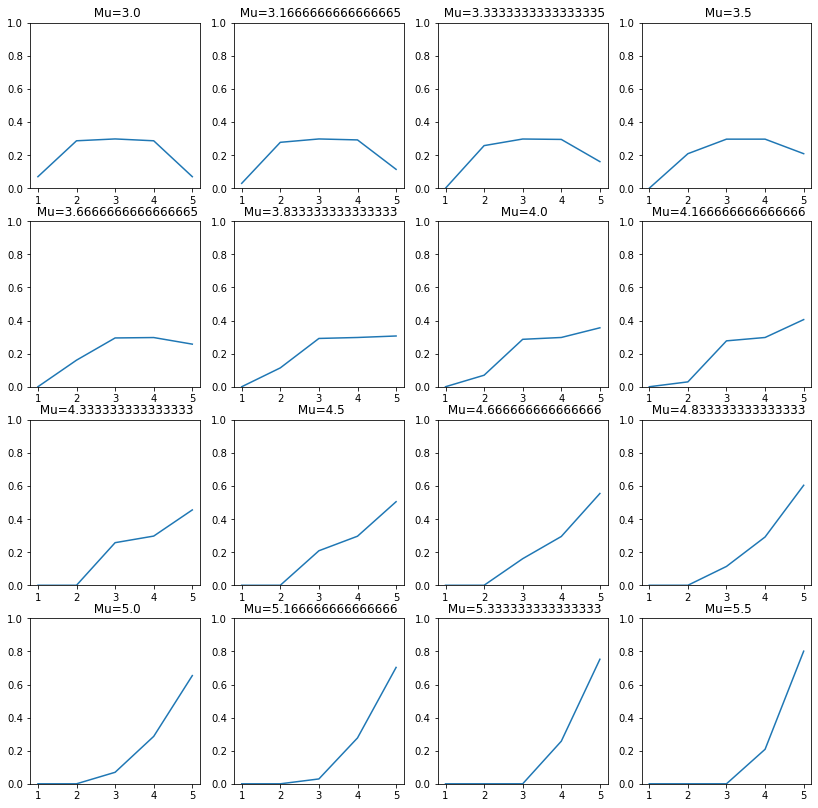

In [130]:
cent_arr=np.linspace(3,5.5,16)
Prob_vec=np.zeros([16,5])
plt.figure(figsize=(14,14))
for j in range(16):
    plt.subplot(4,4,j+1)
    for i in range(5):
        if i==0:
            Prob_vec[j,i]=prob(-5,i+1.5,cent_arr[j])
        elif i==4:
            Prob_vec[j,i]=prob(i+.5,10,cent_arr[j])
        else:
            Prob_vec[j,i]=prob(i+.5,i+1.5,cent_arr[j])
    plt.plot(range(1,6),Prob_vec[j,:])
    plt.ylim(0,1)
    plt.title(" Mu=" + str(cent_arr[j]))
plt.show()

In [141]:
center=pd.DataFrame({'currently_insured' :lst[:,0],'number_of_vehicles':lst[:,1],'number_of_drivers':lst[:,2],
                    'marital_status':lst[:,0], 'centers':centers})
center.to_csv('center.csv', index=False)

In [156]:

search_out=np.array([2,3,4,2,1,0])
approx_shift=np.zeros([2,5])
approx_shift[0,:]=range(5)
approx_shift[1,:]=np.array([.25,.01,0,-.09,-.02])
Pred_by_rank=np.zeros([16,5,5])

In [166]:
for j in range(16):
    df=Acme[(Acme.iloc[:,2]==lst[j,0])&(Acme.iloc[:,3]==lst[j,1])&(Acme.iloc[:,4]==lst[j,2])&(Acme.iloc[:,5]==lst[j,3])]
    Pred_by_rank[j,:,2]=len(df[(df.policies_sold==1)])/len(df[(df.clicked==1)])
    Pred_by_rank[j,:,4]=len(df)
    for i in range(5):
        a=len(df[df.iloc[:,6]==i+1])
        Pred_by_rank[j,i,3]=a
        b=len(df[(df.iloc[:,6]==i+1)&(df.clicked==1)])
        if a==0:
            Pred_by_rank[j,i,0:2]=[-1,-1]
        else:
            Pred_by_rank[j,i,0:2]=[b/a*Pred_by_rank[j,i,2],b/a]
    for i in search_out:
        if (Pred_by_rank[j,i,0] == -1)&(i<2):
            Pred_by_rank[j,i,0:2]=[(Pred_by_rank[j,i+1,1]+approx_shift[1,i])*Pred_by_rank[j,i,2],Pred_by_rank[j,i+1,1]+approx_shift[1,i]]
        elif (Pred_by_rank[j,i,0] == -1)&(i>2):
            Pred_by_rank[j,i,0:2]=[(Pred_by_rank[j,i-1,1]+approx_shift[1,i])*Pred_by_rank[j,i,2],Pred_by_rank[j,i-1,1]+approx_shift[1,i]]
# plt.figure(figsize=(14,14))
# for j in range(16):
#     plt.subplot(4,4,j+1)
#     for i in range(5):
#         num=str(i+1) + ", n=" + str(Pred_by_rank[j,i,3])
#         plt.plot(range(3),Pred_by_rank[j,i,0:3], label = num)
#     plt.legend(fontsize=10)
#     plt.xticks(np.arange(3), ('sales/n', 'clicks/n', 'sales/click'))
#     plt.ylim(-.1,1.1)
#     plt.title(" i=" + str(lst[j,0]) + ", v=" + str(lst[j,1]) + ", d="+ str(lst[j,2]) +
#               ", m="+ str(lst[j,3]) + ", n="+ str(Perc_by_rank[j,0,4]))
# plt.show()

In [400]:
class Tom_method:
    def __init__(self,max_delta_mean,dollar_per_1_change_center,pred_by_rank,prob,centers):
        self.max=max_delta_mean
        self.dol=dollar_per_1_change_center
        self.pred=pred_by_rank
        self.prob=prob
        self.centers=centers
        
    def shift(self,shift):
        if self.pred.shape[0] != len(shift):
            print('shift vector needs to be length '+str(len(self.pred)))
            return 
        for i in range(len(shift)):
            if abs(shift[i])>self.max:
                print('shift in index '+str(i)+' exceeds max shift')
                return 
        cost=10*np.ones(len(shift))
        self.new_centers=self.centers+shift
        self.new_cost=cost-self.dol*shift
        self.sales=np.zeros(self.pred.shape[0])
        self.total_cost=np.zeros(self.pred.shape[0])
        for j in range(self.pred.shape[0]):
            for i in range(self.pred.shape[1]):
                if i==0:
                    prob_rank_i=self.prob(-5,i+1.5,self.new_centers[j])
                elif i==4:
                    prob_rank_i=self.prob(i+.5,10,self.new_centers[j])
                else:
                    prob_rank_i=self.prob(i+.5,i+1.5,self.new_centers[j])
                self.sales[j]=self.sales[j]+prob_rank_i*self.pred[j,i,0]*self.pred[j,i,4]
                self.total_cost[j]=self.total_cost[j]+prob_rank_i*self.pred[j,i,1]*self.pred[j,i,4]*self.new_cost[j]
        return sum(self.total_cost),sum(self.sales),sum(self.sales)/sum(self.total_cost)
                
    def plot(self,n):
        plt.figure(figsize=(7,7))
        Prob_vec=np.zeros([3,5])
        Prob_vec[0,:]=self.pred[n,:,3]/self.pred[n,:,4]
        for i in range(5):
            if i==0:
                Prob_vec[1:3,i]=[self.prob(-5,i+1.5,self.centers[n]),self.prob(-5,i+1.5,self.new_centers[n])]
            elif i==4:
                Prob_vec[1:3,i]=[self.prob(i+.5,10,self.centers[n]),self.prob(i+.5,10,self.new_centers[n])]
            else:
                Prob_vec[1:3,i]=[self.prob(i+.5,i+1.5,self.centers[n]),self.prob(i+.5,i+1.5,self.new_centers[n])]
        plt.bar(range(1,6),Prob_vec[0,:],width=.3,label='data')
        plt.plot(range(1,6),Prob_vec[1,:],label='old_pdf',color='r')
        plt.plot(range(1,6),Prob_vec[2,:],label='new_pdf',color='g')
        plt.legend(fontsize=10)
        plt.title(" i=" + str(lst[n,0]) + ", v=" + str(lst[n,1]) + ", d="+ str(lst[n,2]) +
              ", m="+ str(lst[n,3]) + ", n="+ str(self.pred[n,0,4])+ ", sales/click="+ str(round(self.pred[n,0,0],3)))
        Labels=[]
        for i in range(5):
            Labels.append('click/n= '+str(round(self.pred[5,i,1],2)))
        plt.xticks(range(1,6), Labels)
        plt.show
        print("with mean shift of " +str((10-self.new_cost[n])/self.dol))
        print("expected policies sold for this category with shifted mean =" +str(self.sales[n]))
        print("expected cost per sale with shifted mean =" +str(self.total_cost[n]/self.sales[n]))


In [401]:
Tom=Tom_method(2,1,Pred_by_rank,prob,centers)

with mean shift of 0.0
expected policies sold for this category with shifted mean =15.922264726994403
expected cost per sale with shifted mean =26.250000000000007


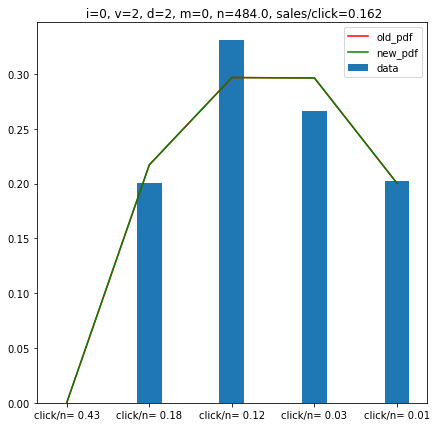

In [402]:
Tom.shift(np.zeros(16))
Tom.plot(5)

with mean shift of -0.5
expected policies sold for this category with shifted mean =23.954028213894986
expected cost per sale with shifted mean =27.562500000000004


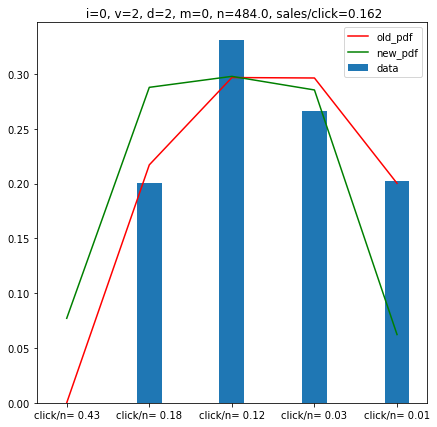

In [403]:
Tom.shift(-.5*np.ones(16))
Tom.plot(5)

with mean shift of 0.5
expected policies sold for this category with shifted mean =11.479341397212025
expected cost per sale with shifted mean =24.937500000000004


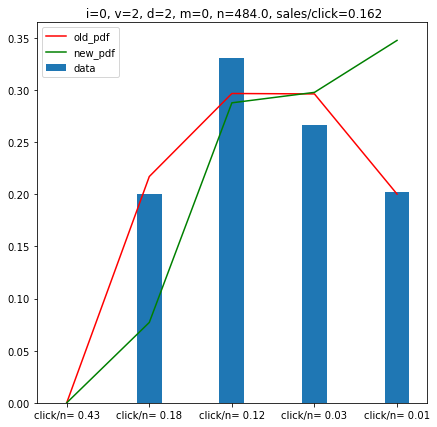

In [404]:

Tom.shift(.5*np.ones(16))
Tom.plot(5)

expected policies sold for this category with shifted mean =34.57904403220877
expected cost per sale with shifted mean =28.874999999999993


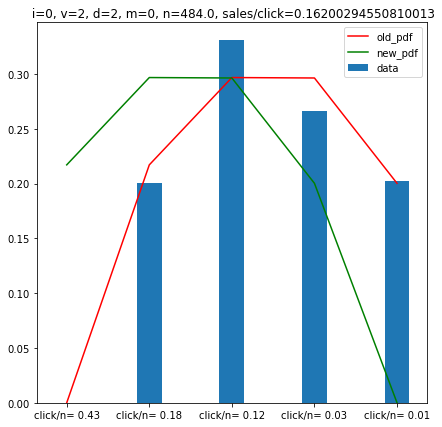

In [382]:
Tom.plot(5,Perc_by_rank)

In [1]:
Perc_buy_rank

NameError: name 'Perc_buy_rank' is not defined